# Students Marks Prediction Using ML and Python

## TMSL_ECE_3rd_Sem
### Project by Mainak Roy, Shreya Das, Lohit Kumar Biswas, Aparna Das, Soumyadeep Mallick

## Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Importing the database

In [2]:
dataset = pd.read_csv("test_scores.csv")
dataset

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20,2FHT3,Female,Does not qualify,62,72
1,ANKYI,Urban,Non-public,6OL,Standard,20,3JIVH,Female,Does not qualify,66,79
2,ANKYI,Urban,Non-public,6OL,Standard,20,3XOWE,Male,Does not qualify,64,76
3,ANKYI,Urban,Non-public,6OL,Standard,20,556O0,Female,Does not qualify,61,77
4,ANKYI,Urban,Non-public,6OL,Standard,20,74LOE,Male,Does not qualify,64,76
...,...,...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,ZBH,Standard,30,T8LSK,Female,Does not qualify,39,55
2129,ZOWMK,Urban,Public,ZBH,Standard,30,VNP26,Female,Qualifies for reduced/free lunch,38,46
2130,ZOWMK,Urban,Public,ZBH,Standard,30,YDR1Z,Female,Qualifies for reduced/free lunch,45,51
2131,ZOWMK,Urban,Public,ZBH,Standard,30,YUEIH,Male,Qualifies for reduced/free lunch,46,53


In [3]:
dataset.head(10)

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20,2FHT3,Female,Does not qualify,62,72
1,ANKYI,Urban,Non-public,6OL,Standard,20,3JIVH,Female,Does not qualify,66,79
2,ANKYI,Urban,Non-public,6OL,Standard,20,3XOWE,Male,Does not qualify,64,76
3,ANKYI,Urban,Non-public,6OL,Standard,20,556O0,Female,Does not qualify,61,77
4,ANKYI,Urban,Non-public,6OL,Standard,20,74LOE,Male,Does not qualify,64,76
5,ANKYI,Urban,Non-public,6OL,Standard,20,7YZO8,Female,Does not qualify,66,74
6,ANKYI,Urban,Non-public,6OL,Standard,20,9KMZD,Male,Does not qualify,63,75
7,ANKYI,Urban,Non-public,6OL,Standard,20,9USQK,Female,Does not qualify,63,72
8,ANKYI,Urban,Non-public,6OL,Standard,20,CS5QP,Male,Does not qualify,64,77
9,ANKYI,Urban,Non-public,6OL,Standard,20,D6HT8,Female,Does not qualify,61,72


## Getting detailed information about the database

In [4]:
dataset.shape

(2133, 11)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   school           2133 non-null   object
 1   school_setting   2133 non-null   object
 2   school_type      2133 non-null   object
 3   classroom        2133 non-null   object
 4   teaching_method  2133 non-null   object
 5   n_student        2133 non-null   int64 
 6   student_id       2133 non-null   object
 7   gender           2133 non-null   object
 8   lunch            2133 non-null   object
 9   pretest          2133 non-null   int64 
 10  posttest         2133 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 183.4+ KB


In [6]:
#Converting Object type Data Types into Numberical Continuous Types
dataset["school_setting"] = dataset["school_setting"].map({"Urban":1, "Suburban":2, "Rural":3})
dataset["school_type"] = dataset["school_type"].map({"Non-public":1, "Public":0})
dataset["teaching_method"] = dataset["teaching_method"].map({"Standard":1, "Experimental":0})
dataset["gender"] = dataset["gender"].map({"Female":1, "Male":0})
dataset["lunch"] = dataset["lunch"].map({"Does not qualify":1, "Qualifies for reduced/free lunch":0})

In [7]:
dataset.corr()

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
school_setting,1.000000,-0.083307,-0.082795,-0.508018,-0.036581,0.025744,0.123575,0.139226
school_type,-0.083307,1.000000,-0.153593,-0.548190,0.017593,0.171196,0.361158,0.373916
teaching_method,-0.082795,-0.153593,1.000000,0.105900,0.020087,-0.017970,-0.115185,-0.312884
n_student,-0.508018,-0.548190,0.105900,1.000000,0.019265,-0.367018,-0.499253,-0.504886
gender,-0.036581,0.017593,0.020087,0.019265,1.000000,-0.016134,-0.006048,-0.006902
lunch,0.025744,0.171196,-0.017970,-0.367018,-0.016134,1.000000,0.622420,0.598371
pretest,0.123575,0.361158,-0.115185,-0.499253,-0.006048,0.622420,1.000000,0.950884
posttest,0.139226,0.373916,-0.312884,-0.504886,-0.006902,0.598371,0.950884,1.000000


<AxesSubplot:>

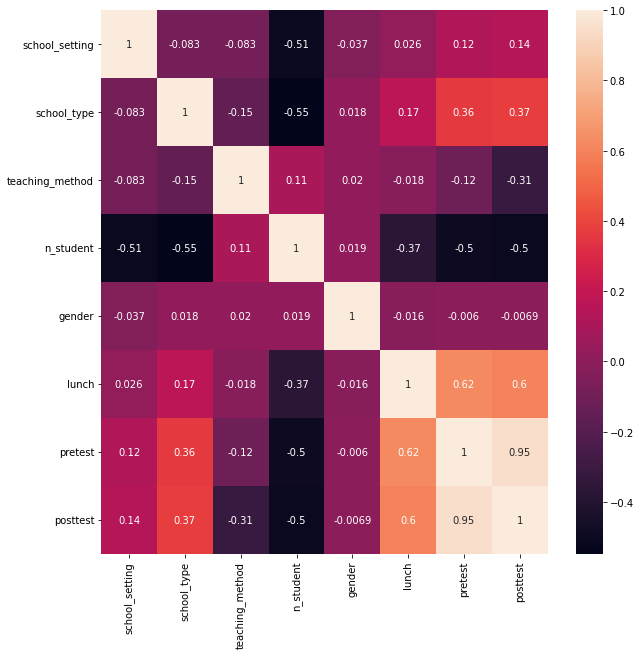

In [8]:
#Finding the correlation between different colums of the dataset in a grpahical manner
cormat = dataset.corr()
top_corr_features = cormat.index
plt.figure(figsize=(10,10))
sns.heatmap(dataset[top_corr_features].corr(),annot=True)

## Data Cleaning

In [9]:
dataset.isnull().values.any()

False

<AxesSubplot:>

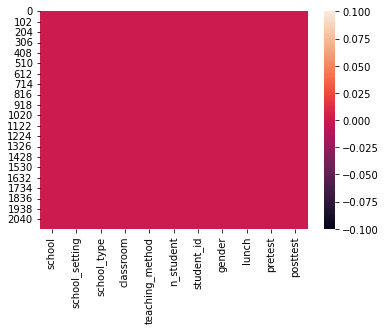

In [10]:
sns.heatmap(dataset.isnull())

## Depedent and Independent Data

In [11]:
#As School name, Classroom type, Student ID dont play any role in the prediction of posttest marks, they have been dropped along with posttest
X = dataset.drop(['school', 'classroom', 'student_id', 'posttest'], axis=1)

In [12]:
Y = dataset["posttest"]

## Data Splitting

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

In [14]:
X_train

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest
1000,3,0,1,20,0,0,46
0,1,1,1,20,1,1,62
1639,2,1,0,16,1,1,71
1158,3,0,0,17,0,1,65
385,2,0,0,28,0,0,55
...,...,...,...,...,...,...,...
960,1,1,1,25,1,1,44
905,1,1,0,17,0,1,85
1096,3,0,1,21,1,1,65
235,1,0,1,28,0,1,56


## Model Training

In [15]:
lin_reg = LinearRegression()

In [16]:
lin_reg.fit(X_train, Y_train)

LinearRegression()

## Model Evaluation

In [17]:
Y_pred = lin_reg.predict(X_test)

In [18]:
Y_pred

array([ 45.92104141,  69.36165454,  50.53237723,  65.91572577,
        43.89882145,  91.95593591,  73.97700464,  71.21020315,
        40.97711867,  42.11406398,  57.46485324,  73.42398651,
        84.86045926,  73.35840202,  69.99274274,  71.15108555,
        91.4712307 ,  61.7419519 ,  42.07707147,  87.63438689,
        83.00395061,  52.63268504,  79.18113255,  84.4731702 ,
        59.85632224,  62.07175583,  46.68840729,  60.7785894 ,
        62.06970442,  78.26222042,  78.93956722,  71.83727707,
        61.26494486,  61.30438995,  97.7813771 ,  42.38245858,
        80.20868736,  40.37892014,  64.06914003,  63.58648623,
        81.72710165,  48.68342744,  90.54896353,  59.96129726,
        53.71558879,  50.13591062,  51.60513022,  80.91422497,
        68.26170173,  60.87946159,  54.85286295,  49.76059589,
        80.2350977 ,  78.01730006,  77.56144489,  74.71552046,
        50.194055  ,  54.69805175,  62.22665712,  76.56005479,
        64.72753436,  64.18058193,  68.30516112,  51.71

In [19]:
df = pd.DataFrame({"Actual":Y_test, "Predicted": Y_pred})
df

,Actual,Predicted
1878,48,45.921041
325,70,69.361655
1941,49,50.532377
242,69,65.915726
763,40,43.898821
...,...,...
589,57,54.543150
1358,79,76.630401
697,54,51.716153
774,46,49.715085


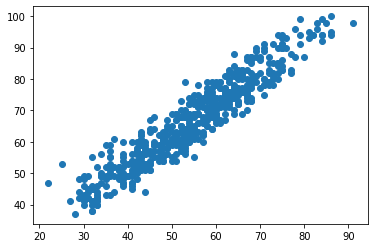

In [20]:
plt.plot(X_test.pretest,Y_test, 'o')

In [21]:
#Finding the coefficient of determination of the prediction.(in % format)
lin_reg.score(X_test,Y_test)*100

94.14893674151669

## Model Testing

In [22]:
print("Enter School name: ")
school = input()
print("Enter School setting(Urban:1, Suburban:2, Rural:3): ")
school_setting = int(input())
print("Enter School type(Non-public:1, Public:0): ")
school_type = int(input())
print("Enter School classroom: ")
classroom = input()
print("Enter teaching method(Standard:1, Experimental:0): ")
teaching_method = int(input())
print("Enter number of classmates: ")
n_student = int(input())
print("Enter Student ID: ")
student_id = input()
print("Enter Student gender(Female:1, Male:0): ")
gender = int(input())
print("Enter lunch support(Does not qualify:1, Qualifies for reduced/free lunch:0): ")
lunch = int(input())
print("Enter PRETEST MARKS: ")
pretest = int(input())

prediction = lin_reg.predict([[school_setting,school_type,teaching_method,n_student,gender,lunch,pretest]])
print("Predicted marks: ",prediction[0])

Enter School name: 
Central Modern School
Enter School setting(Urban:1, Suburban:2, Rural:3): 
1
Enter School type(Non-public:1, Public:0): 
1
Enter School classroom: 
ABCD
Enter teaching method(Standard:1, Experimental:0): 
1
Enter number of classmates: 
40
Enter Student ID: 
46
Enter Student gender(Female:1, Male:0): 
0
Enter lunch support(Does not qualify:1, Qualifies for reduced/free lunch:0): 
1
Enter PRETEST MARKS: 
65
Predicted marks:  72.57961609280683


C:\Users\Mainak Roy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
